# Objectives
YWBAT
* compare and contrast a pmf vs a pdf
* compare and contrast a cdf vs a pdf

# Outline
* Generate discrete data
* Plot the data with a bar chart
* Calculate some probabilities
* Generate some continuous data 
* Plot the data with a histogram
* calculate some probabilities of our data

# PMF vs PDF
**PMF**
* data must be discrete and indepedent
* example
    * dice 
    * coin flip
    * yelp reviews 
    * netflix reviews
    * youtube likes vs dislikes
        * commentors to viewers
    * instagram likes vs impressions
    * age -> after a transformation 
    
**PDF**
* data is continuous and independent
* example
    * temperature
    * weight, height
    * age
    * speed of a car
    * time
    * data usage on a phone (bits)

In [51]:
import numpy as np
import pandas as pd
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Let's make a list of data using numbers 1 - 5
# List of 5000 Yelp Reviews 

# in numpy size = (n, m) -> matrix of dimension nxm
# in numpy size = (n, ) -> vector of dimension nx1

In [12]:
yelp_reviews = np.random.randint(1, 6, size=5000)
yelp_reviews

array([3, 4, 4, ..., 3, 2, 4])

In [14]:
yelp_reviews.max()

5

# So how do I make the PMF?

In [15]:
# so we need to count frequencies of each  value in the array
review_counts = {}
for review in yelp_reviews:
    if review in review_counts.keys():
        review_counts[review] += 1 
    else:
        review_counts[review] = 1
review_counts

{3: 1014, 4: 976, 2: 996, 1: 980, 5: 1034}

In [16]:
review_counts = {}
for review in yelp_reviews:
    review_counts[review] = review_counts.get(review, 0) + 1
review_counts

{3: 1014, 4: 976, 2: 996, 1: 980, 5: 1034}

In [24]:
# we need to find the probability of each one of these occurring
review_counts_percents = {}
total_reviews = sum(review_counts.values())
for review in review_counts.keys():
    percentage = review_counts[review]/total_reviews
    review_counts_percents[review] = percentage

In [25]:
review_counts_percents

{3: 0.2028, 4: 0.1952, 2: 0.1992, 1: 0.196, 5: 0.2068}

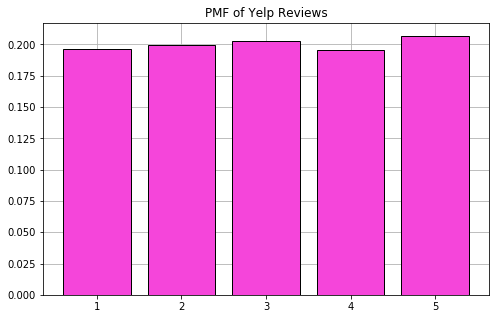

In [39]:
# How do I plot this?
# PMF -> a barchart of all the probabilities of an event occurring

events = review_counts_percents.keys()
percentages = review_counts_percents.values()

plt.figure(figsize=(8, 5))
plt.grid(zorder=0)
plt.bar(events, percentages, color='#f545da', linewidth=1, 
        edgecolor='k', zorder=2)
plt.title("PMF of Yelp Reviews")
plt.show()

# let's generate some continous data

In [67]:
temperatures = np.random.normal(loc=80, scale=5, size=365)

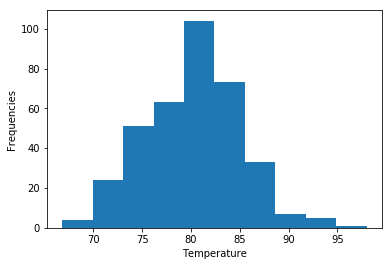

In [68]:
# How do I calculate a probability now?

plt.hist(temperatures)
plt.xlabel("Temperature")
plt.ylabel("Frequencies")
plt.show()

# what does one do to calculate the probability
# that the temperature = 80

# take the area under 80 which equals 0

In [69]:
# P(temperature = 80) = 0

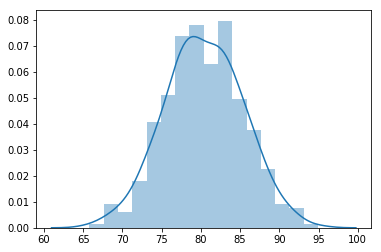

In [50]:
sns.distplot(temperatures)
plt.show()

In [88]:
# PDF probabilities are ranges
# What's the probability of getting temperatures 
# between 79 and 81 [79, 81]

# so calculate the cdf of 81
# subtract the cdf of 79

# this is how you can calculate the area between 79 and 81
scs.norm(80, 5).cdf(81) - scs.norm(80, 5).cdf(79)

0.15851941887820603

In [89]:
def get_temp_probability_band(low, high):
    return scs.norm(80, 5).cdf(high) - scs.norm(80, 5).cdf(low)

In [90]:
get_temp_probability_band(40, 50)

9.865870229416372e-10

# What we learned? 
* learned how to make a dictionary without using Counter 
* definition of a discrete number 
* why exactly we have to take the area under the curve when calculating probabilities (cdf)
* generate random normal data
* scipy.stats.norm is there for a reason
* np.where

In [93]:
temperatures[np.where(temperatures>90)]

array([98.00705302, 93.08467829, 92.3053383 , 93.51413627, 90.02111289,
       92.37430181, 91.93421936, 90.48443923])